# The Sparks Foundation

### Author: Seejan Sunar

### Task 1: Predict the percentage of an student based on the no. of study hours.

This is a simple regression task where we have to find linear relationship between two variables i.e. study_hours and percentage_score. And then we will be applying linear algorithm to predict the percentage scored based upon the number of study hours.

#### Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,5)

#### Step 2: Data Loading and Exploring it

In [2]:
url = "http://bit.ly/w-data"
df1=pd.read_csv(url)
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df1.shape

(25, 2)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

Lets check if there exists any relationship between the study hours and the percentage score.

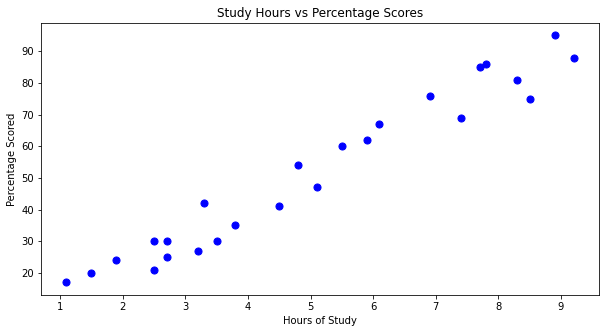

In [7]:
plt.scatter(df1['Hours'], df1['Scores'], color="blue", s=50)  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Scored')  
plt.show()

We can see that there exists a linear relationship between the study hours and the percentage scores. So we are going to apply linear regression model to predict the percentage scores for the given no of study hours.

#### Step 3: Model Building

In [8]:
X = df1.drop('Scores',axis='columns')
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [9]:
y = df1.Scores
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.9454906892105356

<h3 style='color:green'>Measuring accuracy of the model using K-Fold crsoss validation.</h3>

In [12]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.94549069, 0.92568309, 0.93689115, 0.90191438, 0.94929462])

Cross validation score is giving an accuracy of above 90% all the times. But lets check other regression algorithms to see if they gives better score than this.

<h3 style='color:green'>Find best model using GridSearchCV</h3>

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def finding_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

finding_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.931855,{'normalize': True}
1,decision_tree,0.765362,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


We can see that linear regression that we have used before is giving the best socre. So we will be making use of this same regressoin algorithm.

In [14]:
y_predict=lr.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
df2=pd.DataFrame(np.c_[X_test,y_test,y_predict],columns=["Hours", "Original Scores", "Predicted Scores"])
df2

,Hours,Original Scores,Predicted Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


#### Step 4: Testing the model

In [16]:
def predict_score(study_hours):
    x = np.array(study_hours)
    x = x.reshape(1,-1)
    print("Study Hours = {}".format(study_hours))
    print("Percentage Scores = {}".format(lr.predict(x)[0]))

In [17]:
predict_score(9.25)

Study Hours = 9.25
Percentage Scores = 93.69173248737538


#### Step 5:  Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975


#### Step 6: Exporting our model and columns in the form of pickle file
We will be making use of these pickle files while creating python Flask Server and Website.

In [19]:
import pickle
with open('score_predictor.pickle','wb') as f:
    pickle.dump(lr,f)

In [20]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))